('Model Accuracy: ', 0.20466514004501224)
('Price prediction for May: ', array([[1.1645015]]))


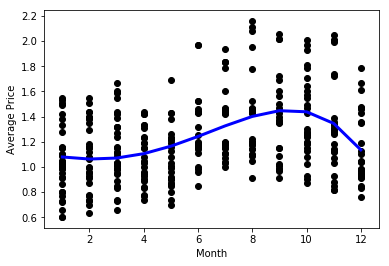

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

avocado = pd.read_csv('data/avocado.csv')
avocado.drop(columns=avocado.columns[0], axis=1, inplace=True)
new_columns = ['Date','AveragePrice','Total Volume','year','region']
#print(avocado.region.unique())
avocado = avocado.drop([c for c in avocado.columns if c not in new_columns], axis=1)
avocado['Date'] = avocado['Date'].str[5:7]
avocado = avocado[avocado['region'].str.contains('Denver', case=True, regex=True)]
avocado = pd.DataFrame({'Month': avocado['Date'], 'Year': avocado['year'],'AveragePrice': avocado['AveragePrice'],'TotalVolume': avocado['Total Volume']})
#avocado['Region'] = LabelEncoder().fit_transform(avocado['Region'])
avocado['Month'] = avocado['Month'].astype(int)

corr = avocado.corr()
corr.style.background_gradient(cmap='coolwarm')

X=avocado.iloc[:,1:2].values #Month
y=avocado.iloc[:,0:1].values #AveragePrice

#create model, train model, make y test predictions
pipeline = make_pipeline(PolynomialFeatures(4), LinearRegression())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
pipeline.fit(np.array(X_train), y_train)
y_pred=pipeline.predict(X_test)

#create a new dataframe with sorted data so the pipeline can create a sequence
df = pd.DataFrame({'x': X_test[:,0], 'y': y_pred[:,0]})
df.sort_values(by='x',inplace = True)
points = pd.DataFrame(df).to_numpy()

#check the model's accuracy
accuracy_score = pipeline.score(X_train,y_train)
print('Model Accuracy: ', accuracy_score)

#make a predictions
print('Price prediction for May: ', pipeline.predict( np.array([ [5] ]) ))

plt.plot(points[:, 0], points[:, 1],color="blue", linewidth=3)
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.scatter(X,y, color="black")
plt.show()